In [1]:
pip install gender-guesser


The following command must be run outside of the IPython shell:

    $ pip install gender-guesser

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
pip install wordcloud


The following command must be run outside of the IPython shell:

    $ pip install wordcloud

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
pip install textblob


The following command must be run outside of the IPython shell:

    $ pip install textblob

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
pip install tweepy


The following command must be run outside of the IPython shell:

    $ pip install tweepy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
import pandas as pd
import tweepy
import json
import csv
import os
import gender_guesser.detector as gender
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Netflix Analysis

In [6]:
df = pd.read_csv (r'twitter_outputNetflix.csv')
df.columns = ['hashtags','id','text','name', 'user', 'user_loc', 'user_desc', 'user_followers', 'user_friend', 'user_listed', 'user_created', 'user_favs','user_statuses']
print (df)

                                                hashtags                   id  \
0                                                     []  1195031235430498304   
1                                                     []  1195031242607124480   
2                                                     []  1195031246990127105   
3                                                     []  1195031247745093633   
4                                                     []  1195031250676961288   
5                                                     []  1195031254120443904   
6                                                     []  1195031254271320065   
7                                                     []  1195031256750284801   
8                                                     []  1195031256909529093   
9                                                     []  1195031258499362816   
10                                                    []  1195031258679709696   
11                          

## Gender Guesser

In [7]:
detector = gender.Detector()
gender_predictions = []
for name in df['name']:
    genderPrediction = detector.get_gender(name)
    gender_predictions.append(genderPrediction)

df['GenderPrediction'] = gender_predictions
print(df['GenderPrediction'].value_counts())

unknown          26765
male              1190
female             737
mostly_male        132
mostly_female       62
andy                60
Name: GenderPrediction, dtype: int64


## Word Cloud

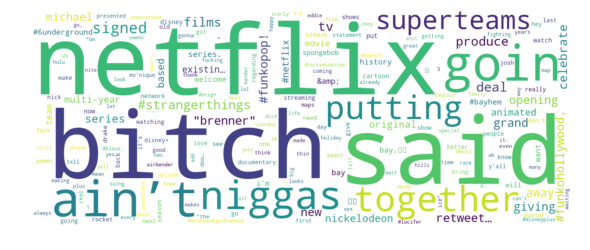

In [8]:
from collections import Counter
words = []
for tweet in df['text']:
    tweet = str(tweet).lower() # Convert to string
    tweets = [i  for i in tweet.split()] # Grab individual tags
    for word in tweets: # Loop through all potential tags
        if word != "":
            words.append(word) # Add a tag if it's not empty
            
word_map = Counter(words) # Variable that holds all hashtag counts
handles=[]
links=[]
company_name=[]
for key in word_map:
    if '@' in key:
        handles.append(key)
    elif 'https' in key:
        links.append(key)
stopwords = set(STOPWORDS)
stopwords.update(["rt"])
stopwords.update(handles)
stopwords.update(links)
stopwords.update(company_name)
delete=[key for key in word_map if key in stopwords]
for key in delete:
    del word_map[key]
wordcloud = WordCloud(stopwords=stopwords, width = 2000, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(word_map)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

## Frequency of Location

In [9]:
print(df['user_loc'].value_counts())

Houston, TX           454
Los Angeles, CA       401
United States         268
California, USA       253
Chicago, IL           208
                     ... 
530                     1
So-Cal ☀                1
Basketball              1
RiP John&Shawn 💔🌕🌹      1
hou, tx                 1
Name: user_loc, Length: 9560, dtype: int64


## Frequency of Hashtags

In [10]:
print(df['hashtags'].value_counts())

[]                                                                           26328
['FunkoHollywood', 'StrangerThings', 'FunkoPop']                               771
['6Underground', 'Bayhem']                                                     327
['Netflix']                                                                    127
['StrangerThings']                                                              80
                                                                             ...  
['MyCountry', 'SaveMe']                                                          1
['JJSneed']                                                                      1
['OfficeLadies', 'netflix']                                                      1
['NewProfiIePic', 'JJSneed', 'DollyPartonHeartstrings', 'ColinODonoghue']        1
['netflix', 'disneyplus', 'streaming']                                           1
Name: hashtags, Length: 617, dtype: int64


## Frequency of name

In [11]:
print(df['name'].value_counts())

.                          74
BatBTeam2Gether            39
Veronica                   35
J                          32
Sandy Avila                30
                           ..
I go, you go, we all go     1
mena                        1
Valencia🌪                   1
Jian                        1
èstacey                     1
Name: name, Length: 24612, dtype: int64


## Frequency of Followers

In [42]:
print(df['user_followers'].value_counts())
print(df['user_followers'].max())
print(df['user_followers'].min())
print(df['user_followers'].std())

112       82
0         70
87        65
86        65
607       61
          ..
7335       1
646319     1
2699       1
3253       1
2047       1
Name: user_followers, Length: 3532, dtype: int64
6819272
0
59835.06901644388


## Number of Retweets using Regex to find the RT in the text of the twitter

In [13]:
import re
dfnumpy= df['text'].to_string()
regex = r'[^R-R][T-T]+.{2,}'
print(len(re.compile(regex).findall(dfnumpy)))

14706


## Polarity Scoring

In [14]:
polarity_score_Netflix = []
subjectivity_score_Netflix = []
for text in df['text']:
    blob = TextBlob(text)
    polarity_score_Netflix.append(blob.sentiment.polarity)
    subjectivity_score_Netflix.append(blob.sentiment.subjectivity)
    
df['PolarityScore'] = polarity_score_Netflix
df['SubjectivityScore'] = subjectivity_score_Netflix

In [15]:
df.describe()

,id,user_followers,user_friend,user_listed,user_favs,user_statuses,PolarityScore,SubjectivityScore
count,2.894600e+04,2.894600e+04,28946.000000,28946.000000,2.894600e+04,2.894600e+04,28946.000000,28946.000000
mean,1.195069e+18,2.109731e+03,757.523630,16.839149,2.540206e+04,3.081066e+04,0.050322,0.121908
std,1.877509e+13,5.983507e+04,2824.488182,269.761001,4.329127e+04,5.744788e+04,0.185329,0.272511
min,1.195031e+18,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,-1.000000,0.000000
25%,1.195055e+18,1.740000e+02,211.000000,0.000000,4.231000e+03,4.736000e+03,0.000000,0.000000
50%,1.195068e+18,3.920000e+02,403.000000,1.000000,1.228650e+04,1.407700e+04,0.000000,0.000000
75%,1.195084e+18,8.170000e+02,775.000000,5.000000,3.040650e+04,3.558575e+04,0.000000,0.000000
max,1.195112e+18,6.819272e+06,261831.000000,22190.000000,2.266299e+06,2.374358e+06,1.000000,1.000000


# Disney Analysis

In [16]:
dfDisney = pd.read_csv (r'twitter_outputDisney.csv') #Reading in the csv file
dfDisney.columns = ['hashtags','id','text','name', 'user', 'user_loc', 'user_desc', 'user_followers', 'user_friend', 'user_listed', 'user_created', 'user_favs','user_statuses'] #Columns for the twitter data
print (df)

      hashtags                   id  \
0           []  1195031235430498304   
1           []  1195031242607124480   
2           []  1195031246990127105   
3           []  1195031247745093633   
4           []  1195031250676961288   
...        ...                  ...   
28941       []  1195112081642516481   
28942       []  1195112082032586752   
28943       []  1195112082762547202   
28944       []  1195112085589348355   
28945       []  1195112088504422401   

                                                    text              name  \
0      RT @DiscussingFilm: Netflix has signed a multi...  Josiel Versace❄️   
1                                   Makes a ton of sense      Eternal Wind   
2      RT @CarolineHobso10: I'm obsessed with @netfli...      Bailey Spore   
3      RT @cozzzy__: these niggas putting superteams ...         shoncia🇬🇾   
4      RT @cozzzy__: these niggas putting superteams ...            Kenya🌸   
...                                                  ...       

## Gender Guesser

In [19]:
detector = gender.Detector()
gender_predictions = [] #creates a file for where gender can be stored along with a name
for name in dfDisney['name']:
    genderPrediction = detector.get_gender(name) #gets the gender based off of the name
    gender_predictions.append(genderPrediction) # predicts the gender here

dfDisney['GenderPrediction'] = gender_predictions
print(dfDisney['GenderPrediction'].value_counts())

unknown          9942
female            335
male              305
mostly_male        46
mostly_female      35
andy               13
Name: GenderPrediction, dtype: int64


## Frequency of Location

In [20]:
print(dfDisney['user_loc'].value_counts())

Los Angeles, CA                 219
United States                   187
California, USA                  85
Orlando, FL                      75
Texas, USA                       71
                               ... 
Wtw                               1
Illinois, USA; St. Louis, MO      1
Sherman, TX                       1
Wichita Falls, TX                 1
In your mind.                     1
Name: user_loc, Length: 3676, dtype: int64


## Frequency of Hashtags

In [21]:
print(dfDisney['hashtags'].value_counts())

[]                                                            3201
['disneyplus']                                                1363
['DisneyPlus']                                                1315
['StarWars']                                                   419
['Disney', 'DisneyPlus']                                       156
                                                              ... 
['fraudulent']                                                   1
['Disneyland', 'IndianaJones']                                   1
['disney', 'ISimpson']                                           1
['StarWars', 'PlayStation4', 'eBay']                             1
['MinnieMouse', 'CookieAnn', 'ADisneyChristmas', 'Disney']       1
Name: hashtags, Length: 1756, dtype: int64


## Frequency of Name

In [22]:
print(dfDisney['name'].value_counts())

Lyft Guy                                     61
Gina                                         41
DL Stats                                     34
IcecreamSelfie                               33
Neal Wertanen                                30
                                             ..
Jim Girardi                                   1
X chet hamby sr.  a very proud deplorable     1
Christian Alvarez⛵️                           1
HoneyBun 🍯💋                                   1
Rollin Through WDW                            1
Name: name, Length: 8716, dtype: int64


## Frequency of Followers

In [43]:
print(dfDisney['user_followers'].value_counts())
print(dfDisney['user_followers'].max())
print(dfDisney['user_followers'].min())
print(dfDisney['user_followers'].std())

0        101
5         99
1         60
8         58
3         55
        ... 
89857      1
1794       1
7678       1
1842       1
71633      1
Name: user_followers, Length: 2788, dtype: int64
13599302
0
148555.1944023372


## Number of Retweets using Regex to find the RT in the text of the twitter

In [24]:
import re
dfnumpy= dfDisney['text'].to_string()
regex = r'[^R-R][T-T]+.{2,}'
print(len(re.compile(regex).findall(dfnumpy)))

2897


## Polarity Scoring

In [25]:
polarity_score = []
subjectivity_score = []
for text in dfDisney['text']:
    blob = TextBlob(text)
    polarity_score.append(blob.sentiment.polarity)
    subjectivity_score.append(blob.sentiment.subjectivity)
    
dfDisney['PolarityScore'] = polarity_score
dfDisney['SubjectivityScore'] = subjectivity_score

In [26]:
dfDisney.describe()

,id,user_followers,user_friend,user_listed,user_favs,user_statuses,PolarityScore,SubjectivityScore
count,1.067600e+04,1.067600e+04,1.067600e+04,10676.000000,1.067600e+04,1.067600e+04,10676.000000,10676.000000
mean,1.195066e+18,5.762161e+03,1.462582e+03,67.093574,2.544380e+04,3.352922e+04,0.141142,0.433928
std,1.932425e+13,1.485552e+05,1.243934e+04,1041.957406,5.458394e+04,9.361138e+04,0.300415,0.372646
min,1.195031e+18,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,-1.000000,0.000000
25%,1.195051e+18,9.300000e+01,1.697500e+02,0.000000,1.081000e+03,1.995250e+03,0.000000,0.000000
50%,1.195064e+18,3.400000e+02,4.360000e+02,3.000000,6.916500e+03,8.848000e+03,0.000000,0.400000
75%,1.195082e+18,1.053000e+03,1.097250e+03,18.000000,2.538700e+04,3.022200e+04,0.250000,0.750000
max,1.195112e+18,1.359930e+07,1.191593e+06,95443.000000,1.066902e+06,2.034666e+06,1.000000,1.000000


## Personal Sentiment Analysis

In [27]:
def create_column(data):
    if data <= -0.5:
        grouping = 'Strong-Negative'
    elif data > -0.5 and data < 0.0:
        grouping = 'Mild-Negative'  
    elif data > 0.0 and data < 0.5:
        grouping = 'Mild Positive'
    elif data >=0.5:
        grouping = 'Strong-Positive'
    else:
        grouping = 'Neutral'
    return grouping

df['sentimentLabel'] = df['PolarityScore'].apply(create_column)
dfDisney['sentimentLabel'] = dfDisney['PolarityScore'].apply(create_column)

Text(0.5, 1.0, 'Gender by Company')

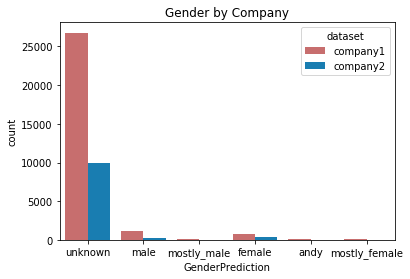

In [28]:
concatenated = pd.concat([df.assign(dataset='company1'), dfDisney.assign(dataset='company2')])
sns.countplot(x="GenderPrediction", hue="dataset", data=concatenated, palette=dict(company1 = "#D65F5F", company2 = '#0085ca'))
plt.title("Gender by Company")

# Analysis of both companies

## Sentiment by Gender for Netflix

Text(0.5, 1.0, 'Sentiment by Gender for Netflix')

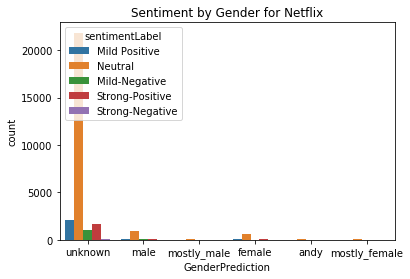

In [29]:
sns.countplot(x="GenderPrediction", hue="sentimentLabel", data=df)
plt.title("Sentiment by Gender for Netflix")

## Gender Prediction for Disney

Text(0.5, 1.0, 'Sentiment by Gender for Disney')

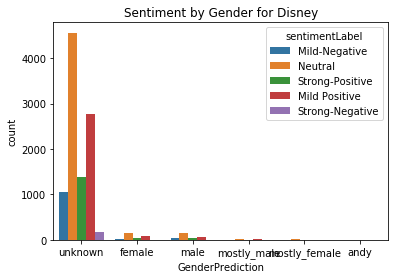

In [30]:
sns.countplot(x="GenderPrediction", hue="sentimentLabel", data=dfDisney)
plt.title("Sentiment by Gender for Disney")

## Comparison of both companies Sentiments

Text(0.5, 1.0, 'Sentiment by Company')

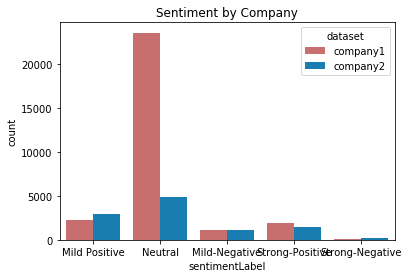

In [31]:
sns.countplot(x="sentimentLabel", hue="dataset", data=concatenated, palette=dict(company1 = "#D65F5F", company2 = '#0085ca'))
plt.title("Sentiment by Company")

## Sentiment of Follower Importance

In [32]:
def create_columnNetflix(data):
    if df['user_followers'] > 5000:
        if data <= -0.5:
            grouping = 'Strong-Negative'
        elif data > -0.5 and data < 0.0:
            grouping = 'Mild-Negative'  
        elif data > 0.0 and data < 0.5:
            grouping = 'Mild Positive'
        elif data >=0.5:
            grouping = 'Strong-Positive'
        else:
            grouping = 'Neutral'
    return grouping

df['importantsentiment'] = df['PolarityScore'].apply(create_column)

Text(0.5, 1.0, 'Sentiment Analysis for Netflix')

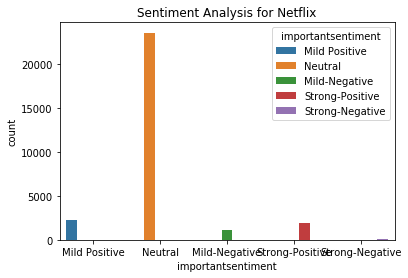

In [35]:
sns.countplot(x="importantsentiment", hue="importantsentiment", data=df)
plt.title("Sentiment Analysis for Netflix")

In [36]:
def create_columnDisney(data):
    if dfDisney['user_followers'] > 5000:
            if data <= -0.5:
                grouping = 'Strong-Negative'
            elif data > -0.5 and data < 0.0:
                grouping = 'Mild-Negative'  
            elif data > 0.0 and data < 0.5:
                grouping = 'Mild Positive'
            elif data >=0.5:
                grouping = 'Strong-Positive'
            else:
                grouping = 'Neutral'
    return grouping
      
dfDisney['importantsentiment'] = dfDisney['PolarityScore'].apply(create_column)

Text(0.5, 1.0, 'Sentiment Analysis for Disney')

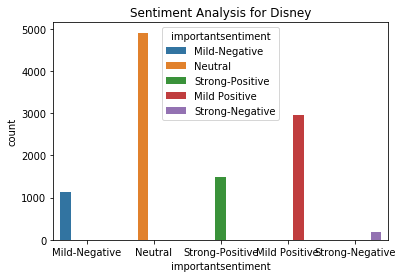

In [37]:
sns.countplot(x="importantsentiment", hue="importantsentiment", data=dfDisney)
plt.title("Sentiment Analysis for Disney")

**Intro**
- Prior to my analysis, I was unsure about the results I would find. The majority of data I knew I would be collecting I assumed with either be positive or negative. I believed initially that the majority of the tweets I pulled would be positive. The majority of the tweets i collected I expected would be individual tweets and not retweets.

**Conclusion**
- In my sentiment analysis of Disney and Netflix, the overall tweets about Netflix are very broad and neutral. However, tweets surrounding Disney have a slighter greater emphasis on a Mild-Positive sentiment. In addition, I was shocked to see how many of my Netflix tweets were neutral. I suppose there is a reason for that if I had more time to delve deeper into the analysis.

**Netflix**
- Location of the Tweets were mostly from Houston, TX. The most popular hashtags were 'FunkoHollywood', 'StrangerThings', and 'FunkoPop' with a total of 771 times. Maximum number of followers: 6819272. Minimum Number of followers: 0. Standard Deviation of Followers: 59835.06901644388 The Total number of Retweets: 14,706

**Disney**
- Location of the Tweets were mostly from Los Angeles, CA. The most popular hashtag was 'disneyplus' with a total of 3,063 times. Maximum number of followers: 13599302. Minimum number of followers: 0. Standard Deviation of Followers: 148555.1944023372 The Total number of Retweets: 2,897